In [1]:
# Importação das Bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
from utils import grafico_distribuicao,label_encoder,set_col_nan,set_nan_negative,replace_col,calc_days_between_date,create_flag

In [2]:
# Caminho relativo para os Dados Brutos
path_cadastral     = 'data/raw/base_cadastral.csv'
path_info          = 'data/raw/base_info.csv'
path_pagament_dev  = 'data/raw/base_pagamentos_desenvolvimento.csv'
path_pagament_test = 'data/raw/base_pagamentos_teste.csv'

In [3]:
path_data_final = 'data/processing/mergin_data_final.parquet'

### Base Cadastral

In [4]:
base_cadastral = pd.read_csv(path_cadastral)
base_cadastral.head()

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62


In [5]:
base_cadastral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB


In [6]:
base_cadastral['ANO_CADASTRO'] = base_cadastral['DATA_CADASTRO'].str[:4]

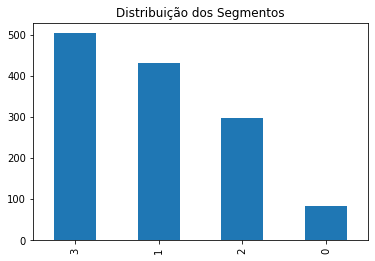

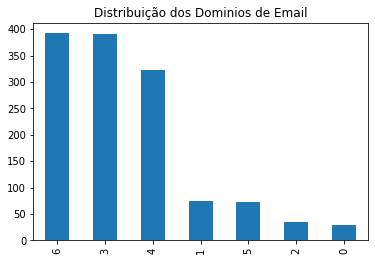

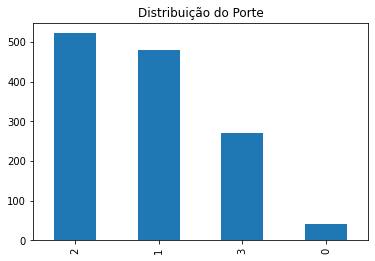

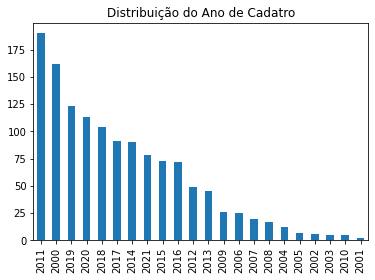

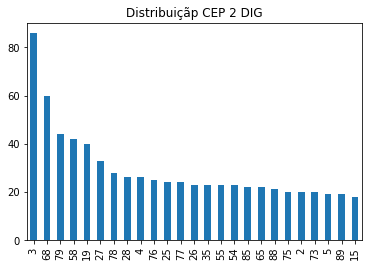

In [12]:
titulos = ['Distribuição dos Segmentos','Distribuição dos Dominios de Email','Distribuição do Porte','Distribuição do Ano de Cadatro','Distribuiçãp CEP 2 DIG']
colunas = ['SEGMENTO_INDUSTRIAL','DOMINIO_EMAIL','PORTE','ANO_CADASTRO','CEP_2_DIG']

for titulo,coluna in zip(titulos,colunas):
    grafico_distribuicao(base_cadastral,titulo,coluna)

In [9]:
base_cadastral[base_cadastral['CEP_2_DIG']=='na']

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,ANO_CADASTRO
934,3903290047715748290,2019-10-07,NaN,NaN,Indústria,HOTMAIL,PEQUENO,na,2019


In [10]:
base_cadastral['DDD'] = replace_col(base_cadastral,'DDD','(','9')
base_cadastral['DDD'] = label_encoder(base_cadastral,'DDD')

In [11]:
base_cadastral['SEGMENTO_INDUSTRIAL'] = label_encoder(base_cadastral,'SEGMENTO_INDUSTRIAL') 
base_cadastral['DOMINIO_EMAIL']       = label_encoder(base_cadastral,'DOMINIO_EMAIL') 
base_cadastral['PORTE']               = label_encoder(base_cadastral,'PORTE')
base_cadastral['CEP_2_DIG']           = replace_col(base_cadastral,'CEP_2_DIG','na',np.nan)
base_cadastral['CEP_2_DIG']           = label_encoder(base_cadastral,'CEP_2_DIG')
base_cadastral['FLAG_PF']             = label_encoder(base_cadastral,'FLAG_PF')

### Base Informações

In [10]:
base_info = pd.read_csv(path_info)
base_info.head()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,92.0
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0


In [11]:
base_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  24401 non-null  float64
 3   NO_FUNCIONARIOS     24401 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB


In [12]:
base_info.groupby(['ID_CLIENTE'])['NO_FUNCIONARIOS'].count().head(10)

ID_CLIENTE
8784237149961904     40
15070048310374146     6
18719614953021044     9
39547025441582855    35
43266641219008038     2
49632905576538927    23
51762959302415533     2
66220087398241662    24
69766362497027920    22
86110062990790869    35
Name: NO_FUNCIONARIOS, dtype: int64

### Base de Pagamentos

In [13]:
base_pagamentos_dev = pd.read_csv(path_pagament_dev)
base_pagamentos_dev.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99


In [14]:
base_pagamentos_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           77414 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [15]:
base_pagamentos_dev['QTD_DIAS_EMISSAO_VENCIMENTO'] = calc_days_between_date(base_pagamentos_dev,'DATA_VENCIMENTO','DATA_EMISSAO_DOCUMENTO')
base_pagamentos_dev['DIAS_ATRASO'] = calc_days_between_date(base_pagamentos_dev,'DATA_PAGAMENTO','DATA_VENCIMENTO')
base_pagamentos_dev['TARGET'] = create_flag(base_pagamentos_dev['DIAS_ATRASO']>=5)

### Cruzamento das Bases

In [16]:
base_final_dev = pd.merge(base_cadastral,base_pagamentos_dev,how='inner',on=['ID_CLIENTE'])

In [17]:
base_final_dev = base_final_dev.merge(base_info,how='inner',on=['ID_CLIENTE','SAFRA_REF'])

In [41]:
base_final_dev.to_parquet(path_data_final)